# Natural Language Processing(NLP)
*The study of programming computers to understand human language.*

Some examples of NLP in the real world are spam detection, smart assistants, and predictive text. 
## Install `nltk` package



In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('all')

from nltk import NaiveBayesClassifier, classify
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import movie_reviews, stopwords
from random import shuffle 
import string
import re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

## Data Cleaning
As with numerical data, textual data has a few staple data cleaning methods to allow for easier analysis.

- Tokenization
- Stemming
- Lemmatization
- Part of Speech Tagging

We can demonstrate these techniques using an example movie review from Batman.

In [ ]:
text = """I really do love this movie. I saw it on opening night and have no regrets. I will admit it is a bit slow at
the beginning but honestly I kind of liked that. It really showed his detective side. He is the world's 
greatest detective and that isn't shown enough in my opinion. There are plenty of awesome fight scenes so 
you get to see a that Batman. Matt Reeves continues to stun me with an amazing movie. Thinking of Dawn of 
the Planet of the Apes and War for the Planet of the apes made no surprise to how amazing the Batman was. 
Matt Reeves did an amazing job with the movie with hidden subtext to how Batman and Riddler are somewhat 
similar. Every time Batman and Riddler meet each other it's through a glass or through a screen symbolizing 
that they're a relfection of each other. There was so much depth and work Matt Reeves pu into the movie. The
acting was absolutely amazing. Like a lot of fans I was skeptical about the actors. But they blew my mind. 
The acting and portrayal of every character was amazing! Robert Pattinson, Zoe Kravitz, Paul Dano, Jefferey 
Wright, Colin Farrell, John Turturro, Andy Serkis, and every other actor in the movie was amazing.
"""

sentences = sent_tokenize(text)
print(sentences)
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower
words = word_tokenize(text)
print(words)

['I really do love this movie.', 'I saw it on opening night and have no regrets.', 'I will admit it is a bit slow at\nthe beginning but honestly I kind of liked that.', 'It really showed his detective side.', "He is the world's \ngreatest detective and that isn't shown enough in my opinion.", 'There are plenty of awesome fight scenes so \nyou get to see a that Batman.', 'Matt Reeves continues to stun me with an amazing movie.', 'Thinking of Dawn of \nthe Planet of the Apes and War for the Planet of the apes made no surprise to how amazing the Batman was.', 'Matt Reeves did an amazing job with the movie with hidden subtext to how Batman and Riddler are somewhat \nsimilar.', "Every time Batman and Riddler meet each other it's through a glass or through a screen symbolizing \nthat they're a relfection of each other.", 'There was so much depth and work Matt Reeves pu into the movie.', 'The\nacting was absolutely amazing.', 'Like a lot of fans I was skeptical about the actors.', 'But they b

### Removing Stop Words
Eliminating common language prepositions. Below are some of the common stop words in English.

In [ ]:
print(stopwords.words("english"))

words = [w for w in words if w not in stopwords.words("english")]
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Stemming
Removing suffixes and prefixes to get the root word.

For example, the words, change, changes, changing, changed, will all have stem 'chang'.

In [ ]:
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['realli', 'love', 'movi', 'saw', 'open', 'night', 'regret', 'admit', 'bit', 'slow', 'begin', 'honestli', 'kind', 'like', 'realli', 'show', 'detect', 'side', 'world', 'greatest', 'detect', 'shown', 'enough', 'opinion', 'plenti', 'awesom', 'fight', 'scene', 'get', 'see', 'batman', 'matt', 'reev', 'continu', 'stun', 'amaz', 'movi', 'think', 'dawn', 'planet', 'ape', 'war', 'planet', 'ape', 'made', 'surpris', 'amaz', 'batman', 'matt', 'reev', 'amaz', 'job', 'movi', 'hidden', 'subtext', 'batman', 'riddler', 'somewhat', 'similar', 'everi', 'time', 'batman', 'riddler', 'meet', 'glass', 'screen', 'symbol', 'relfect', 'much', 'depth', 'work', 'matt', 'reev', 'pu', 'movi', 'act', 'absolut', 'amaz', 'like', 'lot', 'fan', 'skeptic', 'actor', 'blew', 'mind', 'act', 'portray', 'everi', 'charact', 'amaz', 'robert', 'pattinson', 'zoe', 'kravitz', 'paul', 'dano', 'jefferey', 'wright', 'colin', 'farrel', 'john', 'turturro', 'andi', 'serki', 'everi', 'actor', 'movi', 'amaz']


### Lemmatization
Adjusting words into their root words according to grammatical rules.
F
For examplem the words, change, changes, changing, changed, will all be lemmatized to 'change'.

In [ ]:
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['really', 'love', 'movie', 'saw', 'opening', 'night', 'regret', 'admit', 'bit', 'slow', 'beginning', 'honestly', 'kind', 'liked', 'really', 'showed', 'detective', 'side', 'world', 'greatest', 'detective', 'shown', 'enough', 'opinion', 'plenty', 'awesome', 'fight', 'scene', 'get', 'see', 'batman', 'matt', 'reef', 'continues', 'stun', 'amazing', 'movie', 'thinking', 'dawn', 'planet', 'ape', 'war', 'planet', 'ape', 'made', 'surprise', 'amazing', 'batman', 'matt', 'reef', 'amazing', 'job', 'movie', 'hidden', 'subtext', 'batman', 'riddler', 'somewhat', 'similar', 'every', 'time', 'batman', 'riddler', 'meet', 'glass', 'screen', 'symbolizing', 'relfection', 'much', 'depth', 'work', 'matt', 'reef', 'pu', 'movie', 'acting', 'absolutely', 'amazing', 'like', 'lot', 'fan', 'skeptical', 'actor', 'blew', 'mind', 'acting', 'portrayal', 'every', 'character', 'amazing', 'robert', 'pattinson', 'zoe', 'kravitz', 'paul', 'dano', 'jefferey', 'wright', 'colin', 'farrell', 'john', 'turturro', 'andy', 'serki

## Part of Speech Tagging
Another feature useful for analysis.

- CC : coordinating conjunction
- NN : singular noun
- NNS : plural noun
- RB : adverb
- VBG : verb

In [ ]:
tokenized = sent_tokenize(text)
for i in tokenized:
  # Word tokenizers is used to find the words
  # and punctuation in a string
  wordsList = nltk.word_tokenize(i)
  # removing stop words from wordList
  wordsList = [w for w in wordsList if not w in stopwords.words("english")]
  # Using a Tagger. Which is part-of-speech
  # tagger or POS-tagger.
  tagged = nltk.pos_tag(wordsList)
  print(tagged)

[('really', 'RB'), ('love', 'VB'), ('movie', 'NN'), ('saw', 'NN'), ('opening', 'VBG'), ('night', 'NN'), ('regrets', 'NNS'), ('admit', 'VBP'), ('bit', 'RB'), ('slow', 'JJ'), ('beginning', 'VBG'), ('honestly', 'RB'), ('kind', 'NN'), ('liked', 'VBD'), ('really', 'RB'), ('showed', 'JJ'), ('detective', 'JJ'), ('side', 'NN'), ('world', 'NN'), ('greatest', 'JJS'), ('detective', 'JJ'), ('shown', 'VBN'), ('enough', 'JJ'), ('opinion', 'NN'), ('plenty', 'NN'), ('awesome', 'JJ'), ('fight', 'NN'), ('scenes', 'NNS'), ('get', 'VBP'), ('see', 'VB'), ('batman', 'JJ'), ('matt', 'NN'), ('reeves', 'NNS'), ('continues', 'VBZ'), ('stun', 'JJ'), ('amazing', 'JJ'), ('movie', 'NN'), ('thinking', 'VBG'), ('dawn', 'NN'), ('planet', 'NN'), ('apes', 'NNS'), ('war', 'NN'), ('planet', 'NN'), ('apes', 'NNS'), ('made', 'VBN'), ('surprise', 'NN'), ('amazing', 'VBG'), ('batman', 'NN'), ('matt', 'NN'), ('reeves', 'VBZ'), ('amazing', 'JJ'), ('job', 'NN'), ('movie', 'NN'), ('hidden', 'VBN'), ('subtext', 'JJ'), ('batman', '

## Frequency Distribution
NLTK easily allows us to create a FreqDist object for common words and their respective frequencies. We can also easily plot them.


[('the', 34), (',', 32), ('.', 25)]


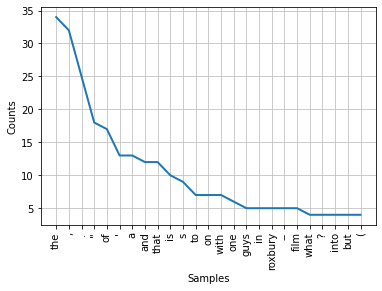

In [ ]:
fd = nltk.FreqDist(words)
print(fd.most_common(3))
# Plotting the first 25 most frequent words
fd.plot(25,cumulative=False)

## Sentiment Analysis
Sentiment analysis is NLP technique used to determine whether textual data is positive, negative or neutral.

Sentiment analysis is frequently used to monitor and understand written feedback online. For example, analyzing customer responses, movie reviews, or product ratings.

Below, we will perform sentiment analysis on the `movie_reviews` data set in the `nltk.corpus` package.

The dataset contains 2K movie reviews in text files that have classified sentiments into two categories, positive and negative.

In [ ]:
print(movie_reviews.categories())
# All words used in movie reviews and their frequencies
nltk.FreqDist(movie_reviews.words()) 

['neg', 'pos']


FreqDist({'plot': 1513,
          ':': 3042,
          'two': 1911,
          'teen': 151,
          'couples': 27,
          'go': 1113,
          'to': 31937,
          'a': 38106,
          'church': 69,
          'party': 183,
          ',': 77717,
          'drink': 32,
          'and': 35576,
          'then': 1424,
          'drive': 105,
          '.': 65876,
          'they': 4825,
          'get': 1949,
          'into': 2623,
          'an': 5744,
          'accident': 104,
          'one': 5852,
          'of': 34123,
          'the': 76529,
          'guys': 268,
          'dies': 104,
          'but': 8634,
          'his': 9587,
          'girlfriend': 218,
          'continues': 88,
          'see': 1749,
          'him': 2633,
          'in': 21822,
          'her': 4522,
          'life': 1586,
          'has': 4719,
          'nightmares': 26,
          'what': 3322,
          "'": 30585,
          's': 18513,
          'deal': 219,
          '?': 3771,
          'wa

In [ ]:
pos_reviews = [] # Creating a list of all positive words
for fileid in movie_reviews.fileids('pos'):
	words = movie_reviews.words(fileid)
	pos_reviews.append(words)
 
print(pos_reviews[0])

neg_reviews = [] # Creating a list of all negative words
for fileid in movie_reviews.fileids('neg'):
	words = movie_reviews.words(fileid)
	neg_reviews.append(words)

print(neg_reviews[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [ ]:
stopwords_english = stopwords.words('english') # List of commonly used words

# Cleaning the words list by removing stopwords and deleting duplicate words
def bag_of_words(words):
	words_clean = []

	for word in words:
		word = word.lower()
		if word not in stopwords_english and word not in string.punctuation: # Eliminating punctuation
			words_clean.append(word)
	
	words_dictionary = dict([word, True] for word in words_clean) # Prevents duplicates
	return words_dictionary


pos_reviews_set = []
for words in pos_reviews:
	pos_reviews_set.append((bag_of_words(words), 'pos'))

neg_reviews_set = []
for words in neg_reviews:
	neg_reviews_set.append((bag_of_words(words), 'neg'))
 
# Randomization
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)

# Create a test set containing 20% each positive and negative reviews
test_set = pos_reviews_set[:200] + neg_reviews_set[:200]
train_set = pos_reviews_set[200:] + neg_reviews_set[200:]

classifier = NaiveBayesClassifier.train(train_set)

accuracy = classify.accuracy(classifier, test_set)
print(accuracy)

0.73


In [ ]:
# Most informative words
print(classifier.show_most_informative_features(10))

Most Informative Features
                  belief = True              pos : neg    =     16.3 : 1.0
                  seagal = True              neg : pos    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     12.2 : 1.0
             outstanding = True              pos : neg    =     12.1 : 1.0
                  turkey = True              neg : pos    =     11.4 : 1.0
             wonderfully = True              pos : neg    =     11.0 : 1.0
               stupidity = True              neg : pos    =     10.6 : 1.0
                  avoids = True              pos : neg    =     10.3 : 1.0
               marvelous = True              pos : neg    =      9.8 : 1.0
                  darker = True              pos : neg    =      9.7 : 1.0
None


In [ ]:
# Testing classifier with a positive and negative review
custom_review = "I hated the film. The acting was bad and the directing was a disaster."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_words(custom_review_tokens)
print(f'Negative review classified as: {classifier.classify(custom_review_set)}')
prob_result = classifier.prob_classify(custom_review_set)
#print(prob_result.max())
print(f'Probability of negative {prob_result.prob("neg")}')
print(f'Probability of positive {prob_result.prob("pos")}')

custom_review = "It was a wonderful and amazing movie. I loved it. Best direction, good acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_words(custom_review_tokens)

prob_result = classifier.prob_classify(custom_review_set)
#print(prob_result.max())
print(f'Positive review classified as: {classifier.classify(custom_review_set)}')
print(f'Probability of negative {prob_result.prob("neg")}')
print(f'Probability of positive {prob_result.prob("pos")}') 

Negative review classified as: neg
Probability of negative 0.8001563109955984
Probability of positive 0.19984368900440158
Positive review classified as: pos
Probability of negative 0.07706733625155567
Probability of positive 0.9229326637484451
